# Random-forest baseline

In this notebook, we carry out a simple baseline based on RandomForest and kmer profiles. 


## We first import packages

In [1]:
# generic imports 
import pandas as pd
import os
import numpy as np
import re

# sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# seaborn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# set random seed
np.random.seed(123)

import utils

## 1. Load train dataset

In [2]:
train_file = "../dataset/datachallenge-traindata.csv"
df_train = pd.read_csv(train_file, sep = ';')
df_train

,idx,label,seq
0,0,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
1,1,R,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
2,2,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
3,3,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
4,4,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
...,...,...,...
2986,2986,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
2987,2987,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
2988,2988,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
2989,2989,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...


### Extract sequences

In [3]:
# extract sequences
seqs = df_train["seq"].values

In [4]:
# print minimum and maximum sequence length
seq_len = [len(x) for x in seqs]
print("minimum / maximum sequence length = {} / {}".format(np.min(seq_len),np.max(seq_len)))

minimum / maximum sequence length = 2043 / 2701


<AxesSubplot:ylabel='Count'>

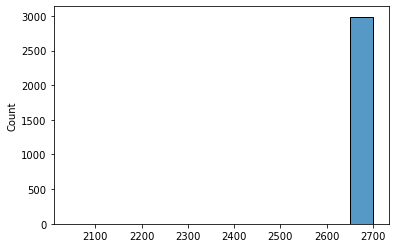

In [5]:
# show histogram
sns.histplot(x=seq_len)

## 2. Build kmer profiles

We first build a dictionary associating an index to each kmer. Note that we will only consider kmers made of A, T, G and C's only.

In [6]:
k = 7
kmer_dic = utils.build_kmer_dic(seqs, k)

found 4828 distinct k-mers out of 16384 possible


We then extract a matrix containing kmer profiles. Each column of the matrix will correspond to a kmer of the dictionary, and will count the number of occurences of this kmer in the sequences.

Note that here we don't need to to padd or truncate sequences.

In [7]:
X_train = utils.build_kmer_profile_matrix(seqs, k, kmer_dic)
print(X_train.shape)

	- kmerizing sequence 1 out of 2991
	- kmerizing sequence 101 out of 2991
	- kmerizing sequence 201 out of 2991
	- kmerizing sequence 301 out of 2991
	- kmerizing sequence 401 out of 2991
	- kmerizing sequence 501 out of 2991
	- kmerizing sequence 601 out of 2991
	- kmerizing sequence 701 out of 2991
	- kmerizing sequence 801 out of 2991
	- kmerizing sequence 901 out of 2991
	- kmerizing sequence 1001 out of 2991
	- kmerizing sequence 1101 out of 2991
	- kmerizing sequence 1201 out of 2991
	- kmerizing sequence 1301 out of 2991
	- kmerizing sequence 1401 out of 2991
	- kmerizing sequence 1501 out of 2991
	- kmerizing sequence 1601 out of 2991
	- kmerizing sequence 1701 out of 2991
	- kmerizing sequence 1801 out of 2991
	- kmerizing sequence 1901 out of 2991
	- kmerizing sequence 2001 out of 2991
	- kmerizing sequence 2101 out of 2991
	- kmerizing sequence 2201 out of 2991
	- kmerizing sequence 2301 out of 2991
	- kmerizing sequence 2401 out of 2991
	- kmerizing sequence 2501 out of 299

In [8]:
print("number of columns of X = {} and number of kmers of the dictionary = {}".format(X_train.shape[1], len(kmer_dic)))
print("min/max value in X = {}/{} ".format(np.min(X_train), np.max(X_train)))

number of columns of X = 4828 and number of kmers of the dictionary = 4828
min/max value in X = 0/5 


We can plot a PCA to make sure that the matrix is well formed.

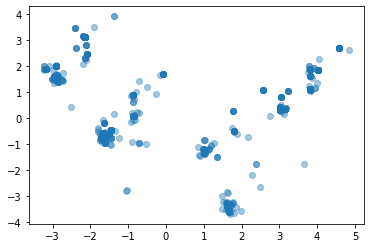

In [9]:
pca = PCA(n_components = 2)
Xpca_train = pca.fit_transform(X_train)
plt.scatter(Xpca_train[:,0], Xpca_train[:,1], alpha = 0.4)

## 3. Fit Random forest model

In [10]:
# encode train labels 
labEncod = LabelEncoder()
y_train = labEncod.fit_transform(df_train.label)

In [11]:
# instanciate RF model 
rf = RandomForestClassifier()

# define model parameters 
parameters = {'n_estimators':[100, 200, 300]}

# define grid search paramaters
clf = GridSearchCV(rf, parameters, cv=5, verbose=2)

# fit the model
clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................................n_estimators=100; total time=  10.0s
[CV] END ...................................n_estimators=100; total time=   9.2s
[CV] END ...................................n_estimators=100; total time=   8.3s
[CV] END ...................................n_estimators=100; total time=   8.2s
[CV] END ...................................n_estimators=100; total time=   9.1s
[CV] END ...................................n_estimators=200; total time=  17.4s
[CV] END ...................................n_estimators=200; total time=  18.0s
[CV] END ...................................n_estimators=200; total time=  18.3s
[CV] END ...................................n_estimators=200; total time=  18.1s
[CV] END ...................................n_estimators=200; total time=  17.7s
[CV] END ...................................n_estimators=300; total time=  24.1s
[CV] END ...................................n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 300]}, verbose=2)

In [12]:
clf.cv_results_

{'mean_fit_time': array([ 9.00420032, 17.90243287, 25.33473501]),
 'std_fit_time': array([0.66296246, 0.3018493 , 2.55192803]),
 'mean_score_time': array([0.06385708, 0.11080942, 0.15771704]),
 'std_score_time': array([0.01834473, 0.02215969, 0.027171  ]),
 'param_n_estimators': masked_array(data=[100, 200, 300],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300}],
 'split0_test_score': array([0.86644407, 0.86644407, 0.87646077]),
 'split1_test_score': array([0.92140468, 0.91973244, 0.92140468]),
 'split2_test_score': array([0.94816054, 0.94648829, 0.94648829]),
 'split3_test_score': array([0.90802676, 0.909699  , 0.90802676]),
 'split4_test_score': array([0.89966555, 0.89799331, 0.89632107]),
 'mean_test_score': array([0.90874032, 0.90807142, 0.90974031]),
 'std_test_score': array([0.02678123, 0.02626362, 0.02356698]),
 'rank_test_score': array([2, 3, 1])}

In [13]:
clf.best_params_

{'n_estimators': 300}

## 4. Compute performance on train dataset

In [15]:
# compute train performance 
pred_train = clf.predict(X_train)
report = classification_report(y_train, pred_train, target_names=labEncod.classes_)
print("\n**** classification report ****")
print(report)


**** classification report ****
              precision    recall  f1-score   support

           R       0.95      0.93      0.94       918
           S       0.97      0.98      0.97      2073

    accuracy                           0.96      2991
   macro avg       0.96      0.95      0.96      2991
weighted avg       0.96      0.96      0.96      2991



In [16]:
# compute confusion matrix 
cm = confusion_matrix(y_train, pred_train)
print("\n**** confusion matrix ****")
print(cm)
# compute sensi/speci and macro accuracy 
sensi = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity: ', sensi )

speci = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity: ', speci)

macro_acc = 0.5*(sensi+speci)
print('Macro accuracy: ', macro_acc)


**** confusion matrix ****
[[ 854   64]
 [  48 2025]]
Sensitivity:  0.9302832244008714
Specificity:  0.9768451519536903
Macro accuracy:  0.9535641881772808
